<a href="https://colab.research.google.com/github/rajibmondal/Projects.NLP/blob/master/NLP_with_Disaster_Tweets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import fastai
fastai.__version__


'1.0.60'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
bs=128

In [16]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/'
base_dir = root_dir #+ 'Disaster_NLP'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
base_dir = Path(base_dir)

In [18]:
# check if the dirctory exists if not make it
import os
if not (os.path.exists(base_dir)):
  base_dir.mkdir(parents=True, exist_ok=True)
base_dir

PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets')

In [19]:
path = Path('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets')
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_test.csv')]

In [20]:
df_full = pd.read_csv(path/'train.csv')
df_full.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [21]:
df = pd.read_csv(path/'clean_train.csv')
df.head()


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [22]:
data_clas = (TextList
           .from_csv(path, 'train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch


In [23]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .,0
xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
xxbos xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .,0


In [24]:
data_clas.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '/']

In [25]:
[(v, i) for i, v in enumerate(data_clas.vocab.stoi)][:100]

[('xxunk', 0),
 ('xxpad', 1),
 ('xxbos', 2),
 ('xxeos', 3),
 ('xxfld', 4),
 ('xxmaj', 5),
 ('xxup', 6),
 ('xxrep', 7),
 ('xxwrep', 8),
 ('/', 9),
 (':', 10),
 ('t.co', 11),
 ('http', 12),
 ('#', 13),
 ('the', 14),
 ('.', 15),
 ('a', 16),
 ('in', 17),
 ('to', 18),
 ('of', 19),
 ('i', 20),
 ('?', 21),
 ('and', 22),
 ('-', 23),
 ("'", 24),
 ('!', 25),
 ('is', 26),
 ('...', 27),
 ('for', 28),
 ('you', 29),
 ('on', 30),
 ("'s", 31),
 ('it', 32),
 ('my', 33),
 ('that', 34),
 ('&', 35),
 ('\n ', 36),
 ('with', 37),
 ('at', 38),
 ('by', 39),
 ('this', 40),
 ("n't", 41),
 ('from', 42),
 ('https', 43),
 ('are', 44),
 ('_', 45),
 ('was', 46),
 ('be', 47),
 ('have', 48),
 ('do', 49),
 ('like', 50),
 ('4', 51),
 ('as', 52),
 ('but', 53),
 ('(', 54),
 (')', 55),
 ('me', 56),
 ('up', 57),
 ('just', 58),
 ('so', 59),
 ('not', 60),
 ('your', 61),
 ('we', 62),
 ('all', 63),
 ('out', 64),
 ('will', 65),
 ('has', 66),
 ('an', 67),
 ('after', 68),
 ('no', 69),
 ('fire', 70),
 ('when', 71),
 ('he', 72),
 ("

In [26]:
data_clas.train_ds[100]

(Text xxbos ' xxmaj the xxunk the conflict the more glorious the xxunk . ' xxmaj thomas xxmaj xxunk,
 Category 0)

In [27]:
data_clas.train_ds[100][0].data[:100]

array([   2,   24,    5,   14,    0,   14, 2262,   14,   82, 3295,   14,    0,   15,   24,    5, 2263,    5,    0])

In [28]:
%time
data_lm = (TextList
           .from_csv(path, 'train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.29 µs


In [29]:
data_lm.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos i 'm on top of the hill and i can see a fire in
1,who was the owner of the range xxunk ? xxbos mom : ' we did n't get home as fast as we xxunk ' \n me : ' why is that ? ' \n mom : ' there was an accident and some truck xxunk xxunk all over xxrep 6 ? xxbos i was in a horrible car accident this past xxmaj sunday . i 'm finally able
2,steve xxmaj jobs xxbos xxmaj tried orange aftershock today . xxmaj my life will never be the same xxbos xxunk i love you xxunk xxbos xxmaj aftershock https : / / t.co / xxunk xxbos xxmaj aftershock back to school kick off was great . i want to thank everyone for making it possible . xxmaj what a great night . xxbos xxmaj people who say it can not be
3,xxbos xxup ambulance xxup sprinter xxup automatic xxup frontline xxup vehicle xxup choice xxup of 14 xxup lez xxup compliant | ebay http : / / t.co / xxunk xxbos xxup ambulance xxup sprinter xxup automatic xxup frontline xxup vehicle xxup choice xxup of 14 xxup lez xxup compliant | ebay http : / / t.co / xxunk xxbos xxunk xxmaj check out what 's in my parking lot !
4,/ xxunk xxrep 4 ? xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... http : / / t.co / xxunk m via @change xxbos xxunk xxmaj please check into xxmaj salt xxmaj river horses help stop the annihilation about to happen without xxunk more xxunk xxunk


In [30]:
%%time
data_lm.save(base_dir/'data_lm.pkl')

CPU times: user 121 ms, sys: 9.63 ms, total: 130 ms
Wall time: 141 ms


In [0]:
data_lm = load_data(base_dir, 'data_lm.pkl', bs=bs)

In [32]:
data_lm.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos i 'm on top of the hill and i can see a fire in
1,who was the owner of the range xxunk ? xxbos mom : ' we did n't get home as fast as we xxunk ' \n me : ' why is that ? ' \n mom : ' there was an accident and some truck xxunk xxunk all over xxrep 6 ? xxbos i was in a horrible car accident this past xxmaj sunday . i 'm finally able
2,steve xxmaj jobs xxbos xxmaj tried orange aftershock today . xxmaj my life will never be the same xxbos xxunk i love you xxunk xxbos xxmaj aftershock https : / / t.co / xxunk xxbos xxmaj aftershock back to school kick off was great . i want to thank everyone for making it possible . xxmaj what a great night . xxbos xxmaj people who say it can not be
3,xxbos xxup ambulance xxup sprinter xxup automatic xxup frontline xxup vehicle xxup choice xxup of 14 xxup lez xxup compliant | ebay http : / / t.co / xxunk xxbos xxup ambulance xxup sprinter xxup automatic xxup frontline xxup vehicle xxup choice xxup of 14 xxup lez xxup compliant | ebay http : / / t.co / xxunk xxbos xxunk xxmaj check out what 's in my parking lot !
4,/ xxunk xxrep 4 ? xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... http : / / t.co / xxunk m via @change xxbos xxunk xxmaj please check into xxmaj salt xxmaj river horses help stop the annihilation about to happen without xxunk more xxunk xxunk


##Training a Language Model with Transer Learning

In [0]:
# drop_mult speifies the amount of dropout to apply
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


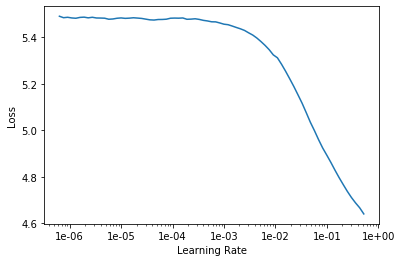

In [34]:
learn.lr_find()
# skip the last 15 learning rates in the plot so we can get a better visualization
learn.recorder.plot(skip_end=15)

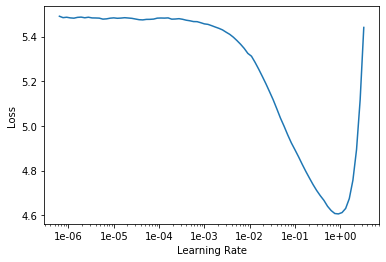

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.973693,3.313830,0.428571,00:07


In [37]:
%%time
learn.export(base_dir/'fit_head.pkl')

CPU times: user 93.3 ms, sys: 38 ms, total: 131 ms
Wall time: 263 ms


In [38]:
learn = load_learner(base_dir, 'fit_head.pkl')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.75E-03


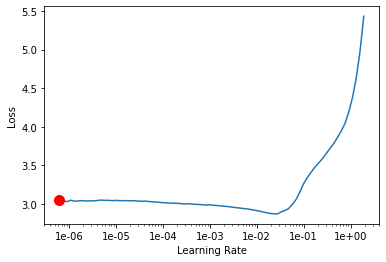

In [41]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.91E-03


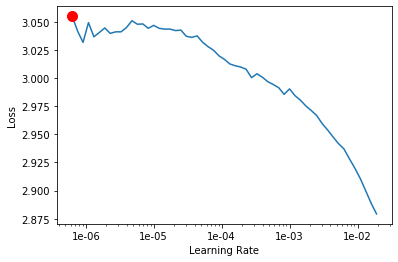

In [42]:
learn.recorder.plot(suggestion=True, skip_end=30)

In [0]:
from fastai.callbacks import *
import os
os.chdir(base_dir)

In [0]:
callbacks = [SaveModelCallback(learn, every='epoch', monitor='valid_loss', mode='auto', name='fine_tuned')]

In [45]:
learn.fit_one_cycle(2, 1e-02, moms=(0.8, 0.7), callbacks=callbacks)

epoch,train_loss,valid_loss,accuracy,time
0,2.998179,3.029183,0.466257,00:08
1,2.597940,2.989907,0.479799,00:08


In [46]:
(base_dir/'models').ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/tmp.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/fine_tuned_0.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/fine_tuned_1.pth')]

In [47]:
learn.load('fine_tuned_1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (6852 items)
x: LMTextList
xxbos xxmaj our xxmaj xxunk are the xxmaj reason of this # earthquake xxmaj may xxup allah xxmaj xxunk us all,xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxmaj all residents asked to ' shelter in place ' are being xxunk by officers . xxmaj no other evacuation or shelter in place orders are expected,xxbos xxunk people xxunk # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school
y: LMLabelList
,,,,
Path: /content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets;

Valid: LabelList (761 items)
x: LMTextList
xxbos @local_arsonist xxup lmfao,xxbos xxunk nah but thinking of getting a stretcher in my xxunk what u think ?,xxbos xxmaj only one man xxmaj xxunk xxmaj xxunk is said to have survived both atomic bomb blasts at # xxmaj hiroshima and # xxmaj nagasaki . 

##Language Model Prediction

In [0]:
WORD = 'The fire'
# how many next words do we want to predict
NUM_OF_NEW_WORDS = 20
# Specify the number of sentences that the model can make using the WORD as a starter
NUM_OF_SENTENCES = 2

In [50]:
print('\n'.join(learn.predict(WORD, NUM_OF_NEW_WORDS, temperature=0.60) for _ in range(NUM_OF_SENTENCES)))

The fire could be a disaster xxbos The Latest : More homes razed by Northern California wildfire
The fire on the Black Hills was burning up and i called the fire alarm . The fire truck


In [51]:
%%time
learn.save_encoder('lm_fine_tuned_enc')

CPU times: user 33.9 ms, sys: 51.1 ms, total: 85.1 ms
Wall time: 220 ms


In [52]:
(base_dir/'models').ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/tmp.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/fine_tuned_0.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/fine_tuned_1.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models/lm_fine_tuned_enc.pth')]

In [53]:
data_lm.train_ds.vocab

In [54]:
# let's see the number of unique words from disaster tweet that are in our vocab
len(data_lm.vocab.itos)

4272

In [55]:
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_train.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/NLP with Disaster Tweets.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/clean_test.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/data_lm.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets/fit_head.pkl')]

In [56]:
data_cls = (TextList.from_csv(path, csv_name='train.csv', cols='text',vocab=data_lm.vocab)
.split_by_rand_pct(valid_pct=0.2, seed=42)
.label_from_df(cols='target')
.add_test(TextList.from_csv(path, csv_name='test.csv', cols='text'))
.databunch(bs=bs))

data_clas.save(base_dir/'data_cls.pkl')

In [0]:
data_cls = load_data(base_dir, 'data_cls.pkl', bs=bs)

In [0]:
# data_clas = (TextList
#            .from_csv(path, vocab=data_lm.vocab,'clean_train.csv')#, cols='text')
#            #Where are the text? Column 'text' of texts.csv
#            .split_by_rand_pct(0.1)
#            #How to split it? Randomly with the default 20% in valid
#            .label_from_df(cols='target')
#            #Label it for a language model
#            .databunch(bs=bs))
#            #Finally we convert to a DataBunch


# # data_clas.save(base_dir/'data_clas.pkl')

In [59]:
clas_learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
clas_learn.load_encoder('lm_fine_tuned_enc')

RuntimeError: ignored

In [0]:
data_cls = load_data(base_dir, 'data_cls.pkl', bs=bs)

In [57]:
data_cls.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .,0
xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,0


In [0]:
clas_learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
clas_learn.load_encoder('lm_fine_tuned_enc')

In [10]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [13]:
import fastai
fastai.__version__

'1.0.60'

In [12]:
fastai.utils.show_install()

AttributeError: ignored

In [0]:
print(clas)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
from fastai.text import *
from fastai import *
bs = 128

In [0]:
data_dir = '/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets'

path = Path(data_dir)

df = pd.read_csv(path/'clean_train.csv')
df.head()

In [0]:
path.ls()
# df.shape

In [0]:
# data_lm = (TextList.from_csv(path,'clean_train.csv')
#            #Inputs: all the text files in path
#             .filter_by_csv(include=['clean_train.csv']) 
#            #We may have other temp folders that contain text files so we only keep what's in train and test
#             .split_by_rand_pct(0.1)
#            #We randomly split and keep 10% (10,000 reviews) for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
# data_lm.save('data1_lm.pkl')

In [0]:
# # data_lm = (TextList.from_folder(path).filter_by_folder(include=['train','test'])
# # .split_by_rand_pct(0.1, seed=42).label_for_lm().databunch(bs=bs, num_workers=1))

# data_clas = (TextList
#            .from_csv(path, 'clean_train.csv', cols='text')
#            #Where are the text? Column 'text' of texts.csv
#            .split_by_rand_pct()
#            #How to split it? Randomly with the default 20% in valid
#            .label_from_df(cols='target')
#            #Label it for a language model
#            .databunch(bs=bs))
#            #Finally we convert to a DataBunch

# data_clas.show_batch()

In [0]:
%time
data = (TextList
           .from_csv(path, 'clean_train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

In [0]:
data.show_batch()

In [0]:
data.save('data1_lm.pkl')

In [0]:
path.ls()

In [0]:
data_lm = load_data(path, 'data1_lm.pkl', bs=bs)

In [0]:
data_lm.show_batch()

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
# learn.recorder.plot(skip_end=25)

In [0]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "there is fire"
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
path.ls()

In [0]:
# data_class = (TextList
#            .from_csv(path, 'clean_train.csv', cols='text')
#            #Where are the text? Column 'text' of texts.csv
#            .split_by_rand_pct()
#            #How to split it? Randomly with the default 20% in valid
#            .label_from_df(cols='target')
#            #Label it for a language model
#            .databunch(bs=bs))
#            #Finally we convert to a DataBunch

###Classifier

In [0]:
data_dir = '/content/drive/My Drive/NLP/NLP_DATA/ NLP with Disaster Tweets'

path = Path(data_dir)

In [0]:
# data_lm = (TextList.from_folder(path).filter_by_folder(include=['train','test'])
# .split_by_rand_pct(0.1, seed=42).label_for_lm().databunch(bs=bs, num_workers=1))

data_clas = (TextList
           .from_csv(path1, 'clean_train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch


data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [0]:
data_clas.show_batch()

In [0]:
data_clas.vocab.itos = data_lm.vocab.itos

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.load_encoder('fine_tuned_enc')

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [0]:
path.ls()

##Clean DATA

In [0]:
df_train = pd.read_pickle(path/'train.pkl')
df_test = pd.read_pickle(path/'test.pkl')
df_train.head()

In [0]:
# # Convert pickle file to csv file

# import pickle        
# import base64

# your_pickle_obj = pickle.loads(open(path/'test.pkl', 'rb').read())
# with open('output.csv', 'a', encoding='utf8') as csv_file:
#     wr = csv.writer(csv_file, delimiter='|')
#     pickle_bytes = pickle.dumps(your_pickle_obj)            # unsafe to write
#     b64_bytes = base64.b64encode(pickle_bytes)  # safe to write but still bytes
#     b64_str = b64_bytes.decode('utf8')          # safe and in utf8
#     wr.writerow(['col1', 'col2', b64_str])


#     #not complete...........

In [0]:
# df_train[100:200]

In [0]:
# df_train.to_csv('full_clean_train.csv')
del df_train['location']
df_train.head()

In [0]:
del df_train['keyword']
df_train.head()

In [0]:
del df_train['text']
df_train.head()

In [0]:
del df_train['target']
df_train.head()

In [0]:
del df_train['id']
df_train.head()

In [0]:
TextDataBunch(df_train)

In [0]:
data_c = (TextList
           
           .from_csv(path, 'clean_train.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

In [0]:
path.ls()